In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy
import os
import scipy.io as sio


In [ ]:
adata1 = sc.read_h5ad("adata/iGlut_pre_filtered_doublets.h5ad")

In [ ]:
adata1.var_names_make_unique()
adata1.obs['sample'] = 'iGlut_pre'

In [9]:
adata = adata1
adata.obs_names_make_unique()

In [12]:
adata

AnnData object with n_obs × n_vars = 304912 × 62710
    obs: 'sample', 'species', 'gene_count', 'tscp_count', 'mread_count', 'bc1_well', 'bc2_well', 'bc3_well', 'bc1_wind', 'bc2_wind', 'bc3_wind', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'percent_mito', 'n_counts', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet'
    var: 'gene_id', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'scrublet', 'sample_colors'

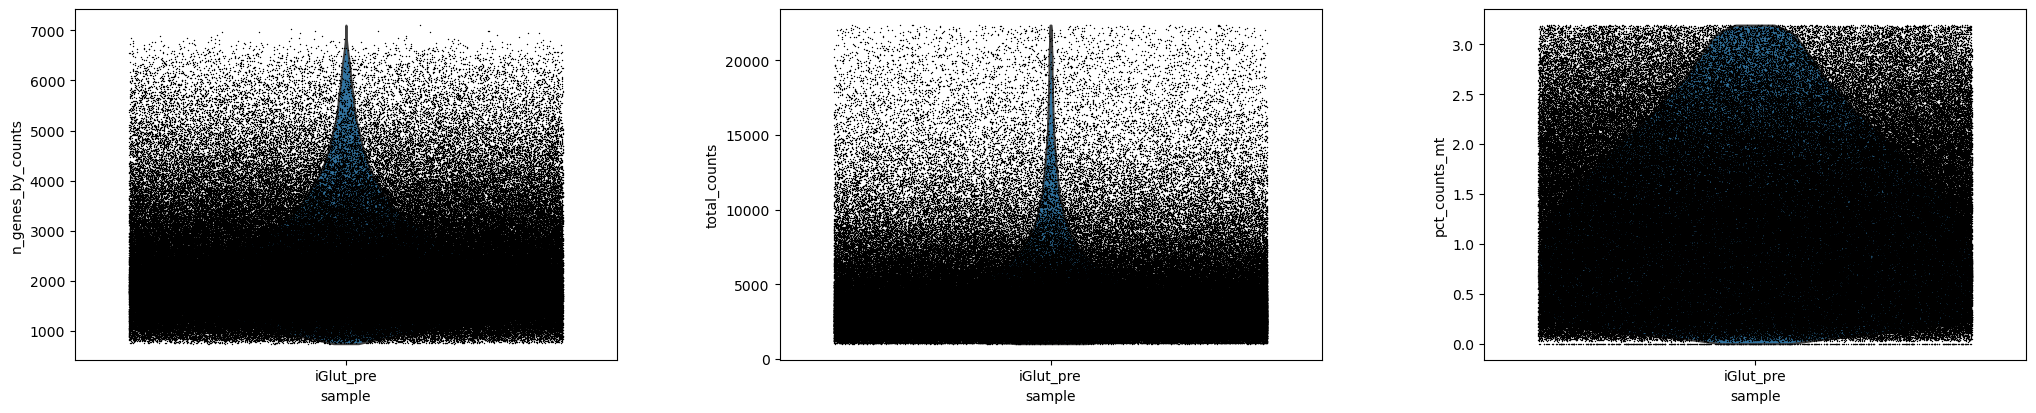

In [13]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],groupby='sample',
             jitter=0.4, multi_panel=True)


In [14]:
sc.pp.filter_genes(adata, min_cells=3)
adata.raw = adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts']) #had a big effect in first clustering
sc.pp.scale(adata, max_value=10)

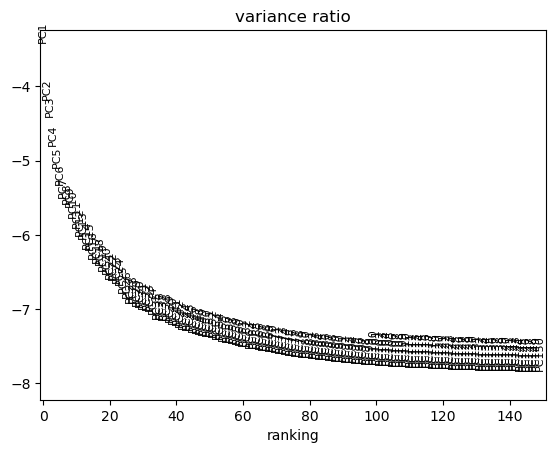

In [15]:
sc.tl.pca(adata, svd_solver='arpack',n_comps=150)
sc.pl.pca_variance_ratio(adata, log=True,n_pcs=150)

In [16]:
adata.write_h5ad("scanpy/iGlut_pre_scaled.h5ad")

In [2]:
adata = sc.read_h5ad("scanpy/iGlut_pre_scaled.h5ad")

In [3]:
from threadpoolctl import threadpool_limits
with threadpool_limits(limits=2, user_api='blas'):
    sc.pp.neighbors(adata, n_neighbors=30, n_pcs=80)
    sc.tl.umap(adata)
    sc.tl.tsne(adata)

IOStream.flush timed out
OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.


In [4]:
adata.write_h5ad("scanpy/iGlut_pre_dr.h5ad")

In [5]:
sc.tl.leiden(adata,resolution=4,key_added='leiden_4')
sc.tl.leiden(adata,resolution=10,key_added='leiden_10')


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


In [6]:
adata.write_h5ad("scanpy/iGlut_pre_dr_clustered.h5ad")

In [7]:
adata1 = sc.read_h5ad("adata/iGlut_pre_filtered_doublets.h5ad")
adata1.var_names_make_unique()
adata1.obs['sample'] = 'iGlut_pre'
adata_raw = adata1

In [8]:
adata_raw.obs = adata.obs
adata_raw.obsm = adata.obsm
adata_raw.obsp = adata.obsp

In [9]:
adata_raw.write_h5ad("scanpy/iGlut_pre_dr_clustered_raw.h5ad")

In [ ]:
# Load gene lists
ion_channels = pd.read_csv("/home/jjanssens/jjans/resources/geneLists/HGNC/human_ion_channels.txt", sep="\t")['Approved symbol'].unique()
tfs = pd.read_csv("/home/jjanssens/jjans/resources/resources.aertslab.org/cistarget/tf_lists/allTFs_hg38.txt", sep="\t", header=None)[0].unique()
info_genes = list(set(ion_channels) | set(tfs))

from clustering_functions import *

/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


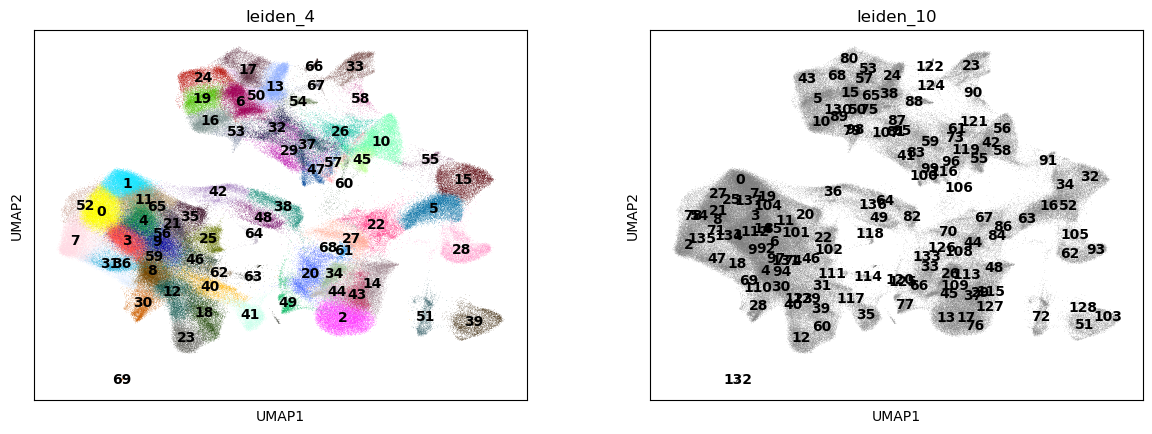

In [14]:
sc.pl.umap(adata_raw,color=['leiden_4','leiden_10'],legend_loc='on data')
plt.show()
plt.close()

In [15]:
adata_raw = merge_clusters_adata(adata_raw,base_resolution='leiden_10',max_iter=20)
adata.obs['merged_clusters_from_10'] = adata.obs['merged_clusters']

1
calculating DEGs


  0%|          | 0/138 [00:00<?, ?it/s]

calculating cluster summaries
merging clusters
2
calculating DEGs


  0%|          | 0/121 [00:00<?, ?it/s]

calculating cluster summaries
merging clusters
3
calculating DEGs


  0%|          | 0/116 [00:00<?, ?it/s]

calculating cluster summaries
merging clusters
4
calculating DEGs


  0%|          | 0/115 [00:00<?, ?it/s]

calculating cluster summaries
merging clusters
number of iterations needed 4
original number of clusters 138
merged number of clusters 115


In [16]:
adata_raw.write_h5ad("scanpy/iGlut_pre_dr_clustered_raw_merged.h5ad")

In [17]:
adata_raw

AnnData object with n_obs × n_vars = 304912 × 62710
    obs: 'sample', 'species', 'gene_count', 'tscp_count', 'mread_count', 'bc1_well', 'bc2_well', 'bc3_well', 'bc1_wind', 'bc2_wind', 'bc3_wind', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'percent_mito', 'n_counts', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'leiden_4', 'leiden_10', 'merged_clusters', 'final_clustering', 'final_clustering_reset', 'merged_clusters_from_10'
    var: 'gene_id', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'scrublet', 'leiden_4_colors', 'leiden_10_colors'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    obsp: 'distances', 'connectivities'

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


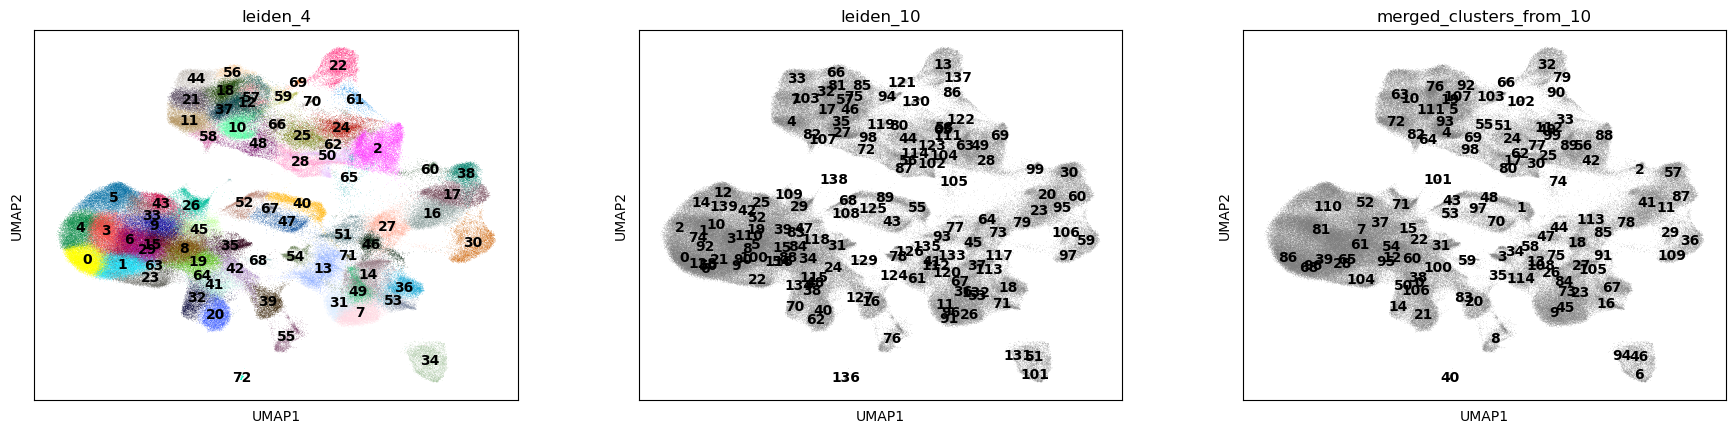

In [21]:
sc.pl.umap(adata_raw,color=['leiden_4','leiden_10','merged_clusters_from_10'],legend_loc='on data')
plt.show()
plt.close()

In [ ]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=80)
sc.tl.umap(adata)
